# Exploratory Data Analysis

## 1

In [256]:
# import our data set and packages
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd
from scipy import stats


## 2

In [74]:
# import dataset
data = pd.read_csv("C:/Users/ryans/Documents/Predictive Modeling/Data Exploration and Analysis/realtor-data.csv")
# read first ten lines of code
data.head(10)


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


## 3 

In [75]:
# Perform univariate analysis on your loaded dataset using the describe function. Report the results
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')).T)

,bed,bath,acre_lot,zip_code,house_size,price
count,320108.000000,321618.000000,331873.000000,407693.000000,324365.000000,407890.000000
mean,3.500200,2.566545,17.418487,3299.396838,2222.782865,675830.723094
std,2.320135,2.391618,931.723094,2222.641467,3333.098041,1178265.720726
min,1.000000,1.000000,0.000000,601.000000,100.000000,1.000000
25%,2.000000,2.000000,0.200000,1890.000000,1206.000000,199900.000000
50%,3.000000,2.000000,0.560000,2822.000000,1767.000000,397900.000000
75%,4.000000,3.000000,2.200000,4630.000000,2640.000000,709000.000000
max,99.000000,198.000000,100000.000000,99999.000000,1450112.000000,60000000.000000


Before moving on to the outliers we can see that the price has a minimum of 1. This value seems odd so we will change the price of all homes under 10,000 to equal the mean. 

In [76]:
# change prices under 10,000 to equal the mean.
data['price'].mask(data['price'].between(0, 9999), inplace = True)
data.isnull().sum()


status                 0
bed                87782
bath               86272
acre_lot           76017
city                  52
state                  0
zip_code             197
house_size         83525
prev_sold_date    266940
price                515
dtype: int64

In [77]:
# now we change these to the mean and check that the min price is 10,000.
data['price'].fillna(data['price'].mean(), inplace = True)
data.isnull().sum()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,320108.0,3.500200,2.320135e+00,1.0,2.0,3.00,4.0,99.0
bath,321618.0,2.566545,2.391618e+00,1.0,2.0,2.00,3.0,198.0
acre_lot,331873.0,17.418487,9.317231e+02,0.0,0.2,0.56,2.2,100000.0
zip_code,407693.0,3299.396838,2.222641e+03,601.0,1890.0,2822.00,4630.0,99999.0
house_size,324365.0,2222.782865,3.333098e+03,100.0,1206.0,1767.00,2640.0,1450112.0
price,407890.0,676680.967951,1.178023e+06,10000.0,199900.0,399000.00,709000.0,60000000.0


In [78]:
# there are many missing values in bed, bath, acre_lot and house_size so I will elect to change them to the median. 
data['bed'].fillna(data['bed'].median(), inplace = True)
data['bath'].fillna(data['bath'].median(), inplace = True)
data['acre_lot'].fillna(data['acre_lot'].median(), inplace = True)
data['house_size'].fillna(data['house_size'].median(), inplace = True)
# check it has been resolved 
data.isnull().sum()
data.head()
data.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

By looking above at the is null values we see that the previous sold date has a lot of na values. We can change the values here to be homes that were sold at one point and homes that were not. The NA values will become homes that were not sold. We can also remove the zip code, city, and state columns because there are many different categorical values associated with them.

In [79]:
# create new variables for sold and not sold
data['sale_history'] = np.where(data.prev_sold_date.isnull(), 'not_sold', 'sold')

# remove previously sold column
data.drop(columns = 'prev_sold_date', inplace = True)
data.drop(columns = 'zip_code', inplace = True)
data.drop(columns = 'city', inplace = True)
data.drop(columns = 'state', inplace = True)
data.columns        

Index(['status', 'bed', 'bath', 'acre_lot', 'house_size', 'price',
       'sale_history'],
      dtype='object')

<Axes: >

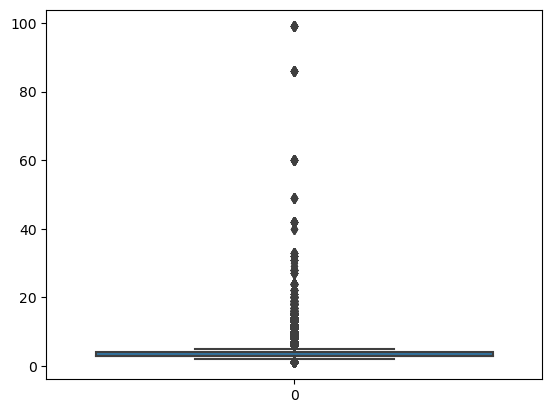

In [47]:
# now that we have cleaned the data a bit, let's examine outliers using boxplots.
#bed
sns.boxplot(data['bed'])

<Axes: >

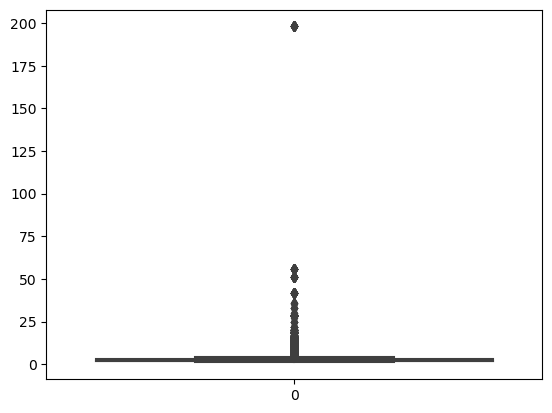

In [48]:
# bath
sns.boxplot(data['bath'])


<Axes: >

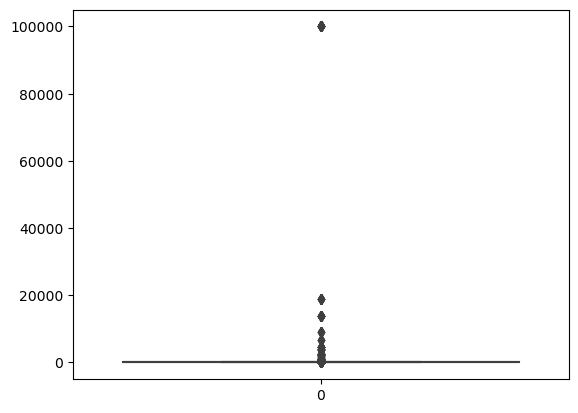

In [49]:
# acres
sns.boxplot(data['acre_lot'])


<Axes: >

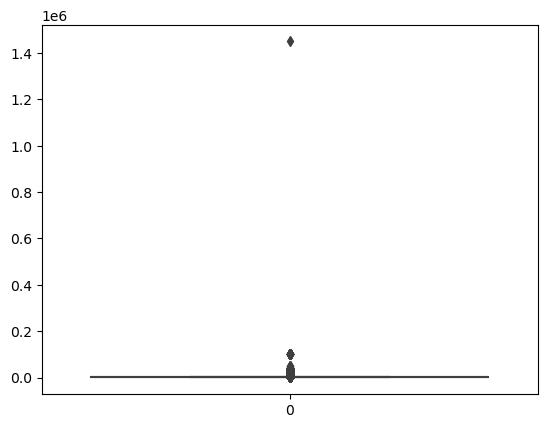

In [50]:
# living space
sns.boxplot(data['house_size'])


<Axes: >

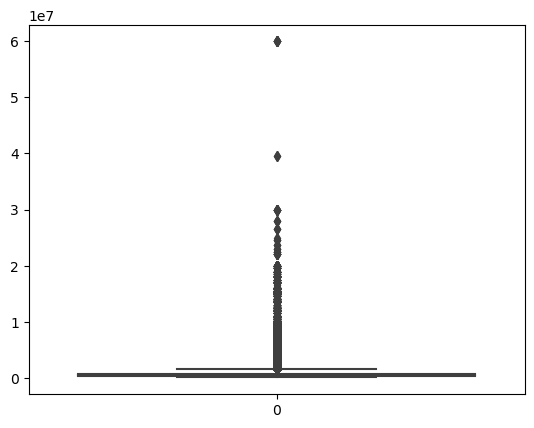

In [51]:
# price
sns.boxplot(data['price'])

We can also use seaborn to make scatterplots of all of our variables to get a better picture of what is happening between variables.

We can see from our boxplots that there are many outliers. We can detect which observations are outliers based on the IQR. The first step is to create the ranges. After finding the IQR we find the upperbound using Q3 + 1.5 * IQR and the lower bound using Q1 + 1.5 * IQR. We see from our code that the shape is now only (261173, 10) when it once was (407890, 10) so we must be careful when removing outliers because we lose a lot of data doing it this way, however, we still have 261k occurences to analyze.

In [80]:
# bed outliers using IQR
# Calculate the upper and lower limits
Q1 = data['bed'].quantile(0.25) # lower q
Q3 = data['bed'].quantile(0.75) # upper q
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR            # lower limit
upper = Q3 + 1.5*IQR            # upper limit
 
# Create arrays
upper_array = np.where(data['bed']>=upper)[0] # those whose value is greater than upper limit go here
lower_array = np.where(data['bed']<=lower)[0]
 
# Removing the outliers
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)
 
# check new describe function for removal
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,358080.0,3.102974,0.776370,2.0,3.00,3.00,3.00,5.0
bath,358080.0,2.292686,1.015729,1.0,2.00,2.00,3.00,29.0
acre_lot,358080.0,15.852622,896.963231,0.0,0.28,0.56,1.85,100000.0
house_size,358080.0,1980.309827,2933.375965,104.0,1372.00,1767.00,2160.00,1450112.0
price,358080.0,612977.330385,937690.038139,10000.0,190000.00,379900.00,689900.00,39500000.0


In [81]:
# make function rules to remove outliers using IQR as above
def remove_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# variables we will be working with
variables = ['bath', 'acre_lot', 'house_size', 'price']

# call the function to remove outliers and save under new data frame
df_clean = remove_outliers(data, variables)

# new data summary statistics
df_clean.head()
df_clean.describe().T
df_clean.shape

(261173, 7)

In [82]:
df_clean.head(10)

,status,bed,bath,acre_lot,house_size,price,sale_history
0,for_sale,3.0,2.0,0.12,920.0,105000.0,not_sold
1,for_sale,4.0,2.0,0.08,1527.0,80000.0,not_sold
2,for_sale,2.0,1.0,0.15,748.0,67000.0,not_sold
3,for_sale,4.0,2.0,0.10,1800.0,145000.0,not_sold
5,for_sale,4.0,3.0,0.46,2520.0,179000.0,not_sold
6,for_sale,3.0,1.0,0.20,2040.0,50000.0,not_sold
7,for_sale,3.0,2.0,0.08,1050.0,71600.0,not_sold
8,for_sale,2.0,1.0,0.09,1092.0,100000.0,not_sold
11,for_sale,3.0,2.0,0.08,1045.0,150000.0,not_sold
13,for_sale,5.0,2.0,0.12,1620.0,79000.0,not_sold


In [83]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,261173.0,3.006046,0.737402,2.0,3.00,3.00,3.00,5.00
bath,261173.0,2.068698,0.708744,1.0,2.00,2.00,2.00,4.00
acre_lot,261173.0,0.764429,0.821460,0.0,0.23,0.56,0.92,4.12
house_size,261173.0,1669.886669,570.395528,104.0,1235.00,1748.00,1920.00,3340.00
price,261173.0,391924.308877,271515.339846,10000.0,179000.00,339900.00,550000.00,1262500.00


We can also use standardized values and z scores to detect our outliers if we choose to do so. In order to do this we will make a new data frame copy so that we will perserve our old data that was used before. After removing our outliers in this fashion we see that we still have over 300k occurences so we lose far less data. 

In [84]:
# create copy to use z score method
data_test = data.copy()
data_test.shape

(358080, 7)

In [85]:
# set up variables to be standardized
data_standardized = data_test[['bed', 'bath', 'acre_lot', 'house_size', 'price']]
data_standardized.columns
 

Index(['bed', 'bath', 'acre_lot', 'house_size', 'price'], dtype='object')

In [86]:
# standardize our df
data_stan = (data_standardized - data_standardized.mean()) / data_standardized.std()

In [87]:
# standardized data frame
data_stan.head()

,bed,bath,acre_lot,house_size,price
0,-0.132636,-0.288154,-0.017540,-0.361464,-0.541733
1,1.155411,-0.288154,-0.017584,-0.154535,-0.568394
2,-1.420682,-1.272668,-0.017506,-0.420100,-0.582258
3,1.155411,-0.288154,-0.017562,-0.061468,-0.499075
5,1.155411,0.696361,-0.017161,0.183983,-0.462815


In [88]:
# standardized removal of outliers is far less than IQR 
z = np.abs(data_stan)
z_outliers_removed = data_stan[(z < 3).all(axis = 1)]
z_outliers_removed.shape

(349105, 5)

## 8

Now we can begin our assessment of bivariate data using scatterplots and correlation matrices. This can easily be done using seaborn. The first thing we will do is find the correlation of our data frame and then insert it into the seaborn heatmap function. A correlation greater than .6 is often said to be too highly correlated together. From our matrix we see bath and house_size are highly correlated at .65. 

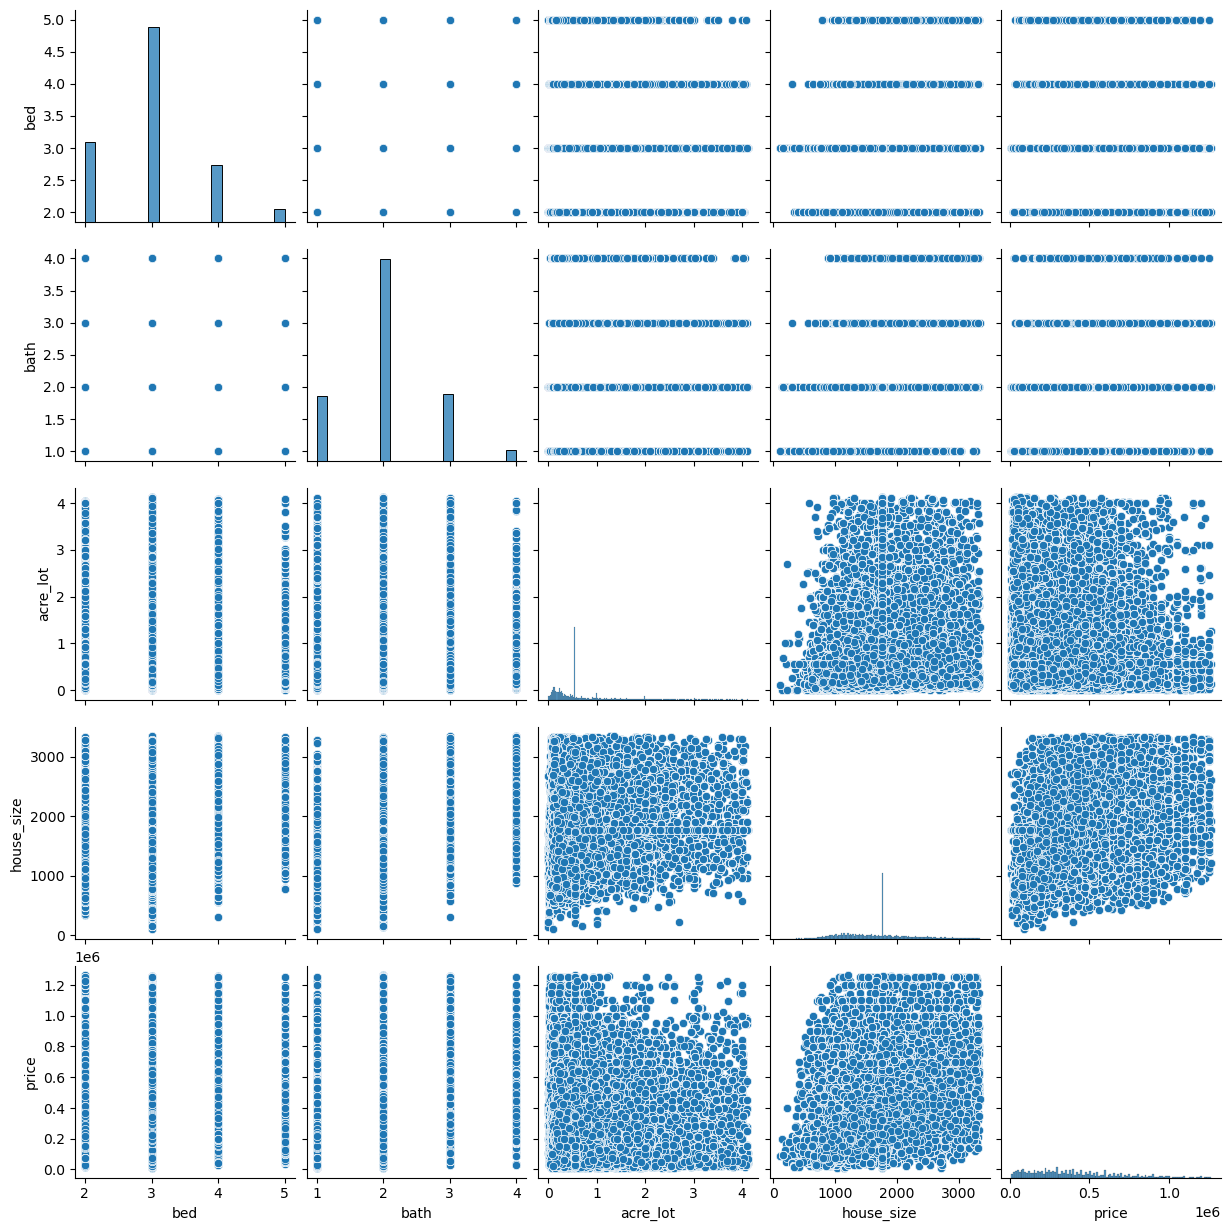

In [61]:
sns.pairplot(df_clean)

Although this is a nice function the most useful scatterplots are based on two continuous variables such as price and acre_lot and price and house size. We can make a simple seaborn scatterplot of both. 

<Axes: xlabel='acre_lot', ylabel='price'>

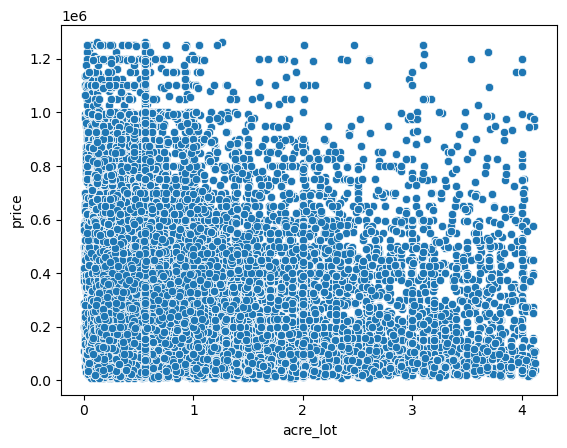

In [68]:
# scatterplot of price and acre_lot
sns.scatterplot(data = df_clean, x = 'acre_lot', y = 'price')

<Axes: xlabel='house_size', ylabel='price'>

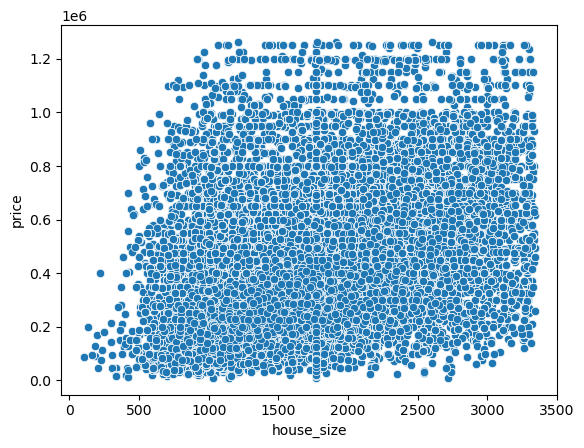

In [69]:
# scatterplot of price and house_size
sns.scatterplot(data = df_clean, x = 'house_size', y = 'price')

C:\Users\ryans\AppData\Local\Temp\ipykernel_11880\3357758406.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_clean.corr()


<Axes: >

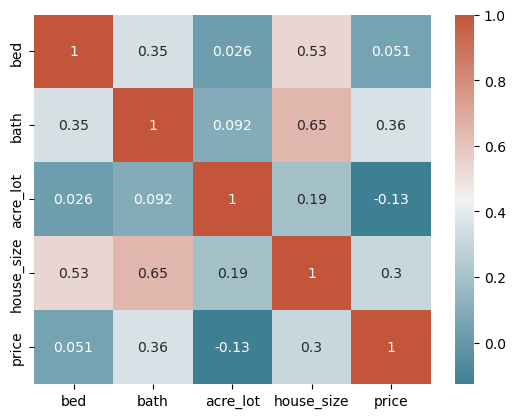

In [89]:
# calculate correlation matrix and view the plot
corr = df_clean.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

# 10

There are some variables in our data that are categorical. These variables are status, and sold history. To work with these categories we will create dummy variables and add them to our clean data. This will change the status variable to status for sale and status not for sale and change the history to sold and not sold. This will make it possible for us to work with dummy variables as we go further into our regression analysis. 

In [90]:
# create dummy variables from data dataframe. 
# use get_dummies on categorical columns
data = pd.get_dummies(data, columns= ['sale_history', 'status'])
data.columns


Index(['bed', 'bath', 'acre_lot', 'house_size', 'price',
       'sale_history_not_sold', 'sale_history_sold', 'status_for_sale',
       'status_ready_to_build'],
      dtype='object')

In [91]:
# values of 1 and zero will show for the sale history sold and not sold
data['sale_history_sold'].value_counts()


0    235688
1    122392
Name: sale_history_sold, dtype: int64

In [67]:
# not sold means 1 so this is the opposite of sale history sold
data['sale_history_not_sold'].value_counts()

1    235688
0    122392
Name: sale_history_not_sold, dtype: int64

## 11

We can also check for correlation among variables using VIF. To do so, we will import another package so that we can use its features. The rule of thumb with VIF is that any number with a VIF score over 5 is highly correlated and should be removed from models. In our case, all of our variables are less than 5. 

In [92]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x = add_constant(data_stan)
pd.Series([variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], 
              index=x.columns)

const         1.000000
bed           1.278286
bath          1.594544
acre_lot      1.000544
house_size    1.100049
price         1.284740
dtype: float64

Since we have clean data with our numerical values without outliers we can now add these categorical columns to our data set. We can do this with the join function.

In [93]:
cat_data = data[['sale_history_not_sold', 'sale_history_sold', 'status_for_sale', 'status_ready_to_build']]

In [94]:
data_final = df_clean.join(cat_data[['sale_history_not_sold', 'sale_history_sold', 'status_for_sale', 'status_ready_to_build']])
data_final.head(10)

,status,bed,bath,acre_lot,house_size,price,sale_history,sale_history_not_sold,sale_history_sold,status_for_sale,status_ready_to_build
0,for_sale,3.0,2.0,0.12,920.0,105000.0,not_sold,1,0,1,0
1,for_sale,4.0,2.0,0.08,1527.0,80000.0,not_sold,1,0,1,0
2,for_sale,2.0,1.0,0.15,748.0,67000.0,not_sold,1,0,1,0
3,for_sale,4.0,2.0,0.10,1800.0,145000.0,not_sold,1,0,1,0
5,for_sale,4.0,3.0,0.46,2520.0,179000.0,not_sold,1,0,1,0
6,for_sale,3.0,1.0,0.20,2040.0,50000.0,not_sold,1,0,1,0
7,for_sale,3.0,2.0,0.08,1050.0,71600.0,not_sold,1,0,1,0
8,for_sale,2.0,1.0,0.09,1092.0,100000.0,not_sold,1,0,1,0
11,for_sale,3.0,2.0,0.08,1045.0,150000.0,not_sold,1,0,1,0
13,for_sale,5.0,2.0,0.12,1620.0,79000.0,not_sold,1,0,1,0


## Extra univariate analysis

array([[<Axes: title={'center': 'bath'}>]], dtype=object)

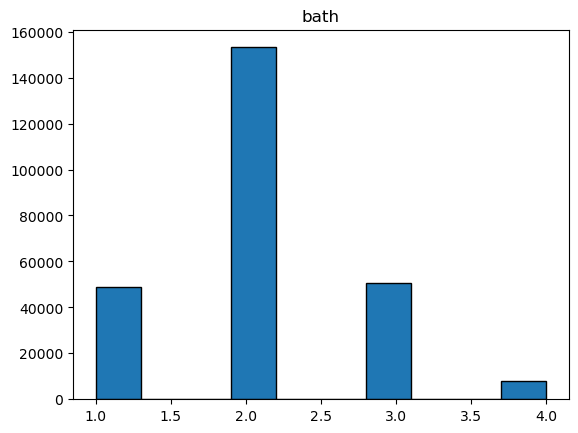

In [225]:
data_final.hist(column='bath', grid=False, edgecolor='black')

array([[<Axes: title={'center': 'bed'}>]], dtype=object)

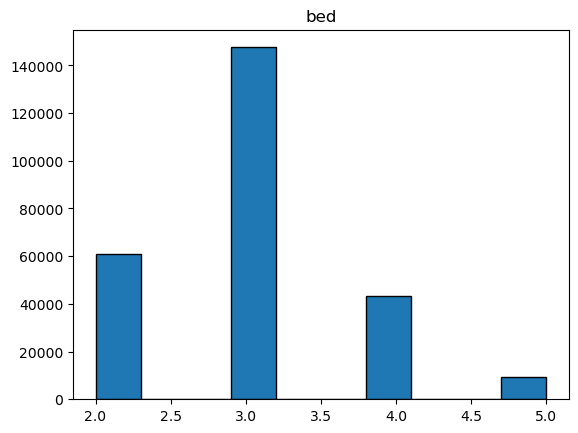

In [226]:
data_final.hist(column='bed', grid=False, edgecolor='black')

# PART 2 LINEAR REGRESSION

### Establish independent and dependent variables

In [161]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
# target variable will be price 
independent = ['status_for_sale', 'status_ready_to_build', 'sale_history_sold', 'sale_history_not_sold', 'bed', 'bath', 'acre_lot', 'house_size']
dependent = 'price'

# print them
independent

['status_for_sale',
 'status_ready_to_build',
 'sale_history_sold',
 'sale_history_not_sold',
 'bed',
 'bath',
 'acre_lot',
 'house_size']

In [97]:
dependent

'price'

## Fit OLS Method

In [113]:
data_final.describe()
textbook_data = data_final.copy() # incase of error

In [118]:
data_final.describe()

,bed,bath,acre_lot,house_size,price,sale_history_not_sold,sale_history_sold,status_for_sale,status_ready_to_build
count,261173.000000,261173.000000,261173.000000,261173.000000,2.611730e+05,261173.000000,261173.000000,261173.000000,261173.000000
mean,3.006046,2.068698,0.764429,1669.886669,3.919243e+05,0.624632,0.375368,0.997772,0.002228
std,0.737402,0.708744,0.821460,570.395528,2.715153e+05,0.484219,0.484219,0.047153,0.047153
min,2.000000,1.000000,0.000000,104.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.230000,1235.000000,1.790000e+05,0.000000,0.000000,1.000000,0.000000
50%,3.000000,2.000000,0.560000,1748.000000,3.399000e+05,1.000000,0.000000,1.000000,0.000000
75%,3.000000,2.000000,0.920000,1920.000000,5.500000e+05,1.000000,1.000000,1.000000,0.000000
max,5.000000,4.000000,4.120000,3340.000000,1.262500e+06,1.000000,1.000000,1.000000,1.000000


In [119]:
data_final['acre_lot'].value_counts()[0]

229

In [120]:
# replace 0 value with small constant .001
data_final['acre_lot'] = data_final['acre_lot'].replace({0: .001})

In [135]:
# now we can log
log_data = np.log(data_final[['acre_lot', 'bed', 'bath', 'house_size', 'price']])

In [136]:
# make final data frame for OLS with logged numerical values
log_final = log_data.join(cat_data[['sale_history_not_sold', 'sale_history_sold', 'status_for_sale', 'status_ready_to_build']])

<Axes: xlabel='house_size', ylabel='price'>

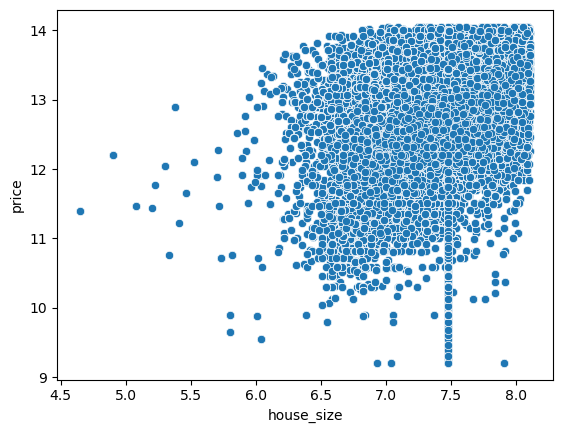

In [130]:
# bivariate tests for linear relationship of logged values
# house_size
sns.scatterplot(data = log_final, x = 'house_size', y= 'price')

<Axes: xlabel='acre_lot', ylabel='price'>

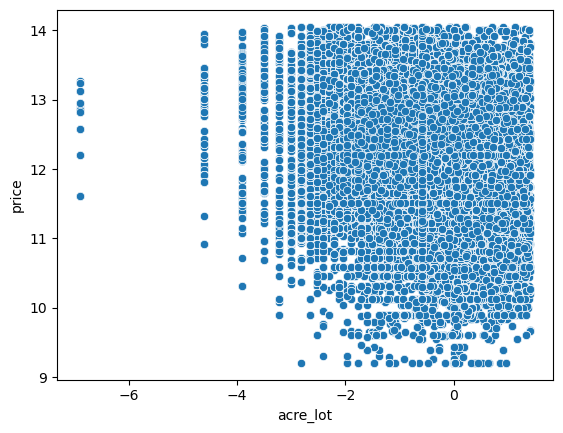

In [204]:
# acre_lot
sns.scatterplot(data = log_final, x = 'acre_lot', y= 'price')

In [146]:
 import statsmodels.api as sm
# response variable 
dependent = log_final['price']

# predictor variables  
independent = log_final[['acre_lot', 'house_size', 'status_for_sale', 'status_ready_to_build', 'sale_history_not_sold', 'sale_history_sold', 'bed', 'bath']]

# add constant
independent = sm.add_constant(independent)

#fit OLS model
ols_model = sm.OLS(dependent, independent).fit()

#view model summary
print(ols_model.summary())

degrees_freedom = 261173 - 261166
degrees_freedom


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     7746.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:31:47   Log-Likelihood:            -3.2166e+05
No. Observations:              261173   AIC:                         6.433e+05
Df Residuals:                  261166   BIC:                         6.434e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.00

7

In [127]:
# degrees of freedom
degrees_freedom = 261173 - 261166
degrees_freedom

7

From these results we get an R^2 value of only .151  which is very low. This would indicate that our model will not be good for making predictions. We can also see from the output that we get an adjusted R^2 of .151, degrees of freedom equal to 7, and all p-values less than .05. Having the p-value less than .05 means that it is statistically significant, but with a small R^2 value it means that we do not have much predictive power. The scatterplot indicated larger acre_lot size will have a higher price but our coefficient says otherwise. I am not able to figure out why this is the case. Let's try to run our model without logging the numerical values.


In [147]:
import statsmodels.api as sm
# response variable 
response = data_final['price']

# predictor variables  
predictor_vars = data_final[['acre_lot', 'house_size', 'status_for_sale', 'status_ready_to_build', 'sale_history_not_sold', 'sale_history_sold', 'bed', 'bath']]

# add constant
predictor_vars = sm.add_constant(predictor_vars)

#fit OLS model
ols_model2 = sm.OLS(response, predictor_vars).fit()

#view model summary
print(ols_model2.summary())

degrees_freedom = 261173 - 261166
degrees_freedom

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                 1.117e+04
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:32:18   Log-Likelihood:            -3.6085e+06
No. Observations:              261173   AIC:                         7.217e+06
Df Residuals:                  261166   BIC:                         7.217e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.878e+

7

By using the data that was not logged we gained 5% in our R^2 value (I was not able to find out why this is). This also makes the coefficients easier to interpret because they are not logged values of the predictors. Since the R^2 is very low we will try this again with a different combination of variables. I am not sure why every variable is statistically significant because in examples online and in the linear regression textbook from the last course I took variables were able to be taken out because they were not statistically significant drivers of the regression. The results show a similar (poor) R^2.

In [288]:
# testing an OLS model with different variables to compare R^2 and p-values
# response variable 
response_again = data_final['price']

# predictor variables  
predictor_again = data_final[['acre_lot', 'house_size', 'sale_history_not_sold', 'sale_history_sold', 'bath']]

# add constant
predictor_again = sm.add_constant(predictor_again)

#fit OLS model
ols_model_again = sm.OLS(response_again, predictor_again).fit()

#view model summary
print(ols_model_again.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                 1.411e+04
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:49:57   Log-Likelihood:            -3.6128e+06
No. Observations:              261173   AIC:                         7.226e+06
Df Residuals:                  261168   BIC:                         7.226e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.409e+

In [151]:
# items to test
x_vif = data_final[['acre_lot', 'house_size', 'status_for_sale', 'status_ready_to_build', 'sale_history_not_sold', 'sale_history_sold', 'bed', 'bath']]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_vif.values, i)
                          for i in range(len(x_vif.columns))]
  
print(vif_data)

C:\Users\ryans\anaconda_3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                 feature       VIF
0               acre_lot  1.078734
1             house_size  2.226099
2        status_for_sale       inf
3  status_ready_to_build       inf
4  sale_history_not_sold       inf
5      sale_history_sold       inf
6                    bed  1.426424
7                   bath  1.722959


From the code above we see that none of our numerical values are highly correlated so no actions need to be made. In general a VIF of 5 or more will indicate high multicollinearity. If this was the case we would have to remove a variable so we do not add redundant information to the model. We would also make two variables into one new variable by combining them. For example if bed and bath was highly correlated we could make a new variable bed_and_bath. I have tried to make dummy variables so that the VIF would be calculated for categorical variables as well but I am not able to get it working. I used get_dummies but it seems they are still treated as 1s and 0s so it will not compute the answer. Now we will split the data into test and train sets to run a linear regression model. I am also confused as to why the "notes" section that gets printed for our OLS model says that multicollinearity is likely, but there was none found. 

In [179]:
# Create dependent and independent variables
X = ['status_for_sale', 'status_ready_to_build', 'sale_history_sold', 'sale_history_not_sold', 'bed', 'bath', 'acre_lot', 'house_size']
y = 'price'


# create train and test split 80 percent to training 20 percent to testing
X_train, X_test, y_train, y_test = train_test_split(data_final[X], data_final[y], test_size=0.2, random_state=7)



In [180]:
# check test shape
X_test.shape, y_test.shape

((52235, 8), (52235,))

In [181]:
# check train shape
X_train.shape, y_train.shape

((208938, 8), (208938,))

In [186]:
# model building
model = LinearRegression()

# use the train data for the model
model.fit(X_train, y_train)

# use trained model to make predictions on the test data. y_test is actual value y_pred is predicted value
y_pred = model.predict(X_test)

# display model summary statistics
print('Coefficients', model.coef_)
print('Intercept', model.intercept_)
print('MSE: %.2f'
     % mean_squared_error(y_test, y_pred))
print('Coefficient of Determination: %.2f'
     % r2_score(y_test, y_pred))
X

Coefficients [-1.56010041e+05  1.56010041e+05  2.55846757e+04 -2.55846757e+04
 -6.50832288e+04  1.03364096e+05 -5.99921097e+04  1.23630340e+02]
Intercept 374757.82540101313
MSE: 58669824776.26
Coefficient of Determination: 0.21


['status_for_sale',
 'status_ready_to_build',
 'sale_history_sold',
 'sale_history_not_sold',
 'bed',
 'bath',
 'acre_lot',
 'house_size']

Since the status for sale and status ready to build will cancel eachother out along with the sale history sold and not sold. This makes me believe there should be a high VIF score for these variables so they may have been coded incorrectly since we could not run the VIF on the categorical variables even though they were dummy coded. We will try to run it again only keeping status_for_sale and sale_history_sold. The results below show no offsetting coefficients so this will be the final model.

In [299]:
# trying again 
data_final1 = data_final[['status_for_sale', 'sale_history_sold', 'bed', 'bath', 'acre_lot', 'house_size', 'price']]
# Create dependent and independent variables
X1 = ['status_for_sale', 'sale_history_sold', 'bed', 'bath', 'acre_lot', 'house_size']
y1 = 'price'


# create train and test split 80 percent to training 20 percent to testing
X1_train, X1_test, y1_train, y1_test = train_test_split(data_final1[X1], data_final1[y1], test_size=0.2, random_state=7)

In [301]:
# model building second try
model1 = LinearRegression()

# use the train data for the model
model1.fit(X1_train, y1_train)

# use trained model to make predictions on the test data. y_test is actual value y_pred is predicted value
y1_pred = model.predict(X_test)

# display model summary statistics
print('Coefficients', model1.coef_)
print('Intercept', model1.intercept_)
print('MSE: %.2f'
     % mean_squared_error(y1_test, y1_pred))
print('Coefficient of Determination: %.2f'
     % r2_score(y1_test, y1_pred))
X

Coefficients [-3.12020081e+05  5.11693514e+04 -6.50832288e+04  1.03364096e+05
 -5.99921097e+04  1.23630340e+02]
Intercept 505183.19036025426
MSE: 58669824776.26
Coefficient of Determination: 0.21


['status_for_sale',
 'status_ready_to_build',
 'sale_history_sold',
 'sale_history_not_sold',
 'bed',
 'bath',
 'acre_lot',
 'house_size']

## Scatterplot of Predictions

In [194]:
np.array(y1_test)

array([ 334900.,  420000., 1050000., ...,  390000., 1199900.,   59000.])

In [193]:
y1_pred

array([368854.5780306 , 242181.9716247 , 460023.80860421, ...,
       611088.66096724, 616569.72287819, 268692.53430778])

<Axes: xlabel='price'>

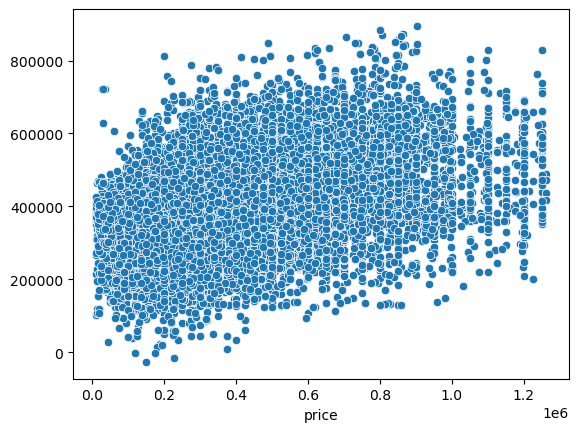

In [197]:
sns.scatterplot(x = y1_test, y = y1_pred)

## Validation

In [244]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# create data frame
val_data = data_final[['status_for_sale', 'sale_history_sold', 'bed', 'bath', 'acre_lot', 'house_size', 'price']]
val_data

,status_for_sale,sale_history_sold,bed,bath,acre_lot,house_size,price
0,1,0,3.0,2.0,0.12,920.0,105000.0
1,1,0,4.0,2.0,0.08,1527.0,80000.0
2,1,0,2.0,1.0,0.15,748.0,67000.0
3,1,0,4.0,2.0,0.10,1800.0,145000.0
5,1,0,4.0,3.0,0.46,2520.0,179000.0
...,...,...,...,...,...,...,...
407885,1,1,4.0,1.0,0.26,1254.0,197000.0
407886,1,1,2.0,1.0,0.23,624.0,150000.0
407887,1,1,4.0,1.0,0.33,1238.0,199900.0
407888,1,1,4.0,3.0,2.34,3320.0,579900.0


In [248]:
# Create dependent and independent variables

X3 = val_data.iloc[:, :-1]
y3 = val_data.iloc[:, -1]

# create train and test split 80 percent to training 20 percent to testing
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=7)

lr = LinearRegression()
lr.fit(X3_train, y3_train)
lr.score(X3_test, y3_test)


0.20576452216702135

In [279]:
# create k fold
kf = KFold(n_splits = 10, shuffle = True, random_state = 7)
kf

KFold(n_splits=10, random_state=7, shuffle=True)

In [250]:
# function for our data
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X3_train, y3_train)
    return model.score(X3_test, y3_test)


In [251]:
# test function for accuracy not using a split
get_score(LinearRegression(), X3_train, X3_test, y3_train, y3_test)

0.20576452216702135

In [280]:
from numpy import mean
from numpy import absolute
#use k-fold CV to evaluate model
scores = cross_val_score(lr, X3, y3,
                         cv=kf, n_jobs=-1)

#view scores
print("Resulting accuracy of %0.2f with a standard deviation of %0.2f" % (absolute(scores.mean()), scores.std()))

Resulting accuracy of 0.20 with a standard deviation of 0.00


In [283]:
#MAE scoring
#use k-fold CV to evaluate model
scores2 = cross_val_score(lr, X3, y3, scoring='neg_mean_absolute_error',
                         cv=kf, n_jobs=-1)

#view mean absolute error
mean(absolute(scores2))

192011.07030479456

The k-fold cross validation score of 192011.97 tells us the MAE. This is the average absolute error of our model and this number is very high so our model does not perform well. This number can be related to our R2 value which was only 20, so a high MAE here makes sense. If we were using a model that worked with classification such as a yes or a no response, we could also use a confusion matrix to validate our model however we are predicting a continuous variable so this is not possible. In the end, we can use our coefficients to solve our business problem question of, "Using our variables in the model, how accurately can we predict the price of real estate?" To do so by hand we would create a hypothetical home with all the attributes of our X3 variable and multiply them by their coefficient. In practice we would use the y3_predict variables to do so. Since our model performed poorly, I would not use this model in practice. 

### Our final linear regression equation

In [315]:
lr.coef_ , lr.intercept_

(array([-3.12020081e+05,  5.11693514e+04, -6.50832288e+04,  1.03364096e+05,
        -5.99921097e+04,  1.23630340e+02]),
 505183.19036025426)

In [316]:
X3

,status_for_sale,sale_history_sold,bed,bath,acre_lot,house_size
0,1,0,3.0,2.0,0.12,920.0
1,1,0,4.0,2.0,0.08,1527.0
2,1,0,2.0,1.0,0.15,748.0
3,1,0,4.0,2.0,0.10,1800.0
5,1,0,4.0,3.0,0.46,2520.0
...,...,...,...,...,...,...
407885,1,1,4.0,1.0,0.26,1254.0
407886,1,1,2.0,1.0,0.23,624.0
407887,1,1,4.0,1.0,0.33,1238.0
407888,1,1,4.0,3.0,2.34,3320.0


We can use the above coefficients and intercept to create an equation and make a single prediction. We will create an observation with a number of each attribute and multiply the coefficients by our attribute. In our example we will predict the price of a 2 bedroom, 3 bathroom, 0.1 acre lot, 1400 house size, status for sale, and history not sold.

In [327]:
print('Intercept: %.2f'
     % lr.intercept_)
print('Coefficients: ', lr.coef_)


Intercept: 505183.19
Coefficients:  [-3.12020081e+05  5.11693514e+04 -6.50832288e+04  1.03364096e+05
 -5.99921097e+04  1.23630340e+02]


In [341]:
a =-3.12020081e+05
b =5.11693514e+04
c =-6.50832288e+04
d =1.03364096e+05
e =-5.99921097e+04
f = 1.23630340e+02

a = float(f'{a:.6f}') # for sale 1
b = float(f'{b:.6f}') # history sold 1
c = float(f'{c:.6f}') # bed
d = float(f'{d:.6f}') # bath
e = float(f'{e:.6f}') # acre lot
f = float(f'{f:.6f}') # size

In [344]:
one_house = (a * 1) + (b * 0) + (c * 2) + (d * 3) + (e * .1) + (f *1400)


In [345]:
one_house

34989.01443000001

If we insert this observation in to our model we will predict that a house with these attributes will be priced at $34,989.01. It is very important to note that this model did not get good accuracy ratings and should not be used in practice. I am not sure where the errors where made whether it be fixing outliers, not following linear assumptions, code in error or something else but I have tried many ways and used many resources to try to do this correctly. I am not understanding why adding acre size or the number of bedrooms would drive down the price and I am not sure where my errors occured. I would greatly appreciate feedback and guidance on where I went wrong and what I should have done because I think these variables should have a linear relationship and fairly high R^2 value.